In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd
import seaborn as sns
import glob
import cv2
import re
import os
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
#Here I have a about 200 images in the below folder 'train' glob will get all the images from folder here
path = glob.glob('./train/*.JPG')
image=[]
for img in path:
    v = cv.imread(img) #It will loads all the images from a file
    blur = cv.GaussianBlur(v,(5,5),0)
    gray = cv.cvtColor(blur,cv.COLOR_BGR2GRAY)# here changing  color image to gray scale
    image.append(gray)

In [4]:
names=os.listdir('train')#it will get on the images names from a directory
string = ''.join(names)
result=re.findall(r'\_(\d)',string)
Birds = list(map(int, result))
len(Birds)

200

In [5]:
#Function for certain features:
def Headers(Kernel):
    x,y = np.nonzero(thresh)  #It will returns the nonzero values of the array
    x = x - np.mean(x)
    y = y - np.mean(y)
    coords = np.vstack([x, y])
    vax = [np.var(x)]          #Variance(x)
    vax = np.nan_to_num(vax)   # It will replace any null values with zeros
    vay = [np.var(y)]          #Variance(y)
    vay = np.nan_to_num(vay)
    correlation = [np.corrcoef(x,y)[0][1]] #correlation
    correlation = np.nan_to_num(correlation)
    covariance = [np.cov(x,y)[0][1]]    #covariance
    covariance = np.nan_to_num(covariance)
    cov = np.cov(coords)
    cov= np.nan_to_num(cov)
    evals, evecs = np.linalg.eig(cov) #creating eigen values and eigen vectors
    sort_indices =np.argsort(evals)[::-1] # index sorting & inversing [::-1]
    x_v1,y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
    x_v2,y_v2 = evecs[:, sort_indices[1]]  # Eigenvector with lowest eigenvalue
    
    angel1 = math.degrees(np.arctan(y_v1/x_v1))   #theta value of 1st vector
    angel2= math.degrees(np.arctan(y_v2/x_v2))    #theta value of 2nd vector
    return  vax,vay,correlation,covariance,angel1,angel2 #It will give us all above defined values


In [6]:
# we are going to extract all features for all images 
for i in image:    
    #Here we are using different kernels/Filters to extract features needed form all the images
 
    
    #blur = cv.GaussianBlur(i,(5,5),cv.CV_64F)
    fil = cv.bilateralFilter(i,5,cv.CV_32F,150,150)
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
    ero = cv.erode(fil,kernel,iterations=2)
    laplacian = cv.Laplacian(ero,cv.CV_64F)
    _,thresh = cv.threshold(laplacian,15,255,cv.THRESH_BINARY)
    vaxL,vayL,ccL,dataL,angelL1,angelL2 = Headers(laplacian) #applying function with new variables names

    
    #blur = cv.GaussianBlur(i,(5,5),cv.CV_64F)
    cann = cv.Canny(i,cv.CV_8U,100,200)
    _,thresh = cv.threshold(cann,15,255,cv.THRESH_BINARY)
    vaxC,vayC,ccC,dataC,angelC1,angelC2 = Headers(cann) #applying function  with new variables names
     
    #blur = cv.GaussianBlur(i,(5,5),cv.CV_64F)
    scharrx = cv.Scharr(fil,cv.CV_64F,1,0)# scharrx 
    scharry = cv.Scharr(fil,cv.CV_64F,0,1) #scharry
    scharr = cv.addWeighted(scharrx,0.5,scharry,0.5,0)
    scharr_ = np.maximum(scharr,50) # threshold the value to 50
    scharr_[scharr_==50]=0 # collect those values
    _, thresh = cv.threshold(scharr_,15,255,cv.THRESH_BINARY)#create a thershold
    vaxS,vayS,ccS,dataS,angelS1,angelS2 = Headers(scharr_)#applying function to kernel4 with new variables names

    #blur = cv.GaussianBlur(i,(5,5),cv.CV_64F)
    sobelx = cv.Sobel(i,cv.CV_64F,1,0,ksize=5) # sobel x
    sobely = cv.Sobel(i,cv.CV_64F,0,1,ksize=5) # sobel y
    sobel = cv.addWeighted(sobelx,0.5,sobely,0.5,0) # sobel = sobel x + sobel y
    sobel_ = np.maximum(sobel,50) # threshold the value to 50
    sobel_[sobel_==50]=0 # collect those values
    _, thresh = cv.threshold(sobel_,15,255,cv.THRESH_BINARY)#create a thershold
    vaxO,vayO,ccO,dataO,angelO1,angelO2 = Headers(sobel_) #applying function to kernel1 with new variables namesthose values
    
    
    
    # This gives a matrix with same dimesions of our image with all values being 75
    matrix = np.ones(i.shape, dtype = "uint8") * 75
    # We use the matrix to add to our image
    added = cv2.add(i, matrix)
    _,thresh = cv.threshold(added,15,255,cv.THRESH_BINARY)
    vaxa,vaya,cca,dataa,angela1,angela2 = Headers(added)
    
    
    
    
    kernel_sharpening = np.array([[-1,-1,-1], 
                                  [-1, 9,-1],
                                  [-1,-1,-1]])
    sharpened = cv2.filter2D(i, -1, kernel_sharpening)
    _,thresh = cv.threshold(added,15,255,cv.THRESH_BINARY)
    vaxsh,vaysh,ccsh,datash,angelsh1,angelsh2 = Headers(added)
    
   
    #Creating a data frame table for all the features obtained for each kernel:
    
    data={'vaxO':vaxO,'vayO':vayO,'ccO':ccO,'dataO':dataO,'angelO1':angelO1,'angelO2':angelO2,'vaxL':vaxL,'vayL':vayL,'ccL':ccL,'dataL':dataL,'angelL1':angelL1,'angelL2':angelL2,'vaxS':vaxS,'vayS':vayS,'ccS':ccS,'dataS':dataS,'angelS1':angelS1,'angelS2':angelS2,
    'vaxC':vaxC,'vayC':vayC,'ccC':ccC,'dataC':dataC,'angelC1':angelC1,'angelC2':angelC2,'vaxa':vaxa,'vaya':vaya,'cca':cca,'dataa':dataa,'angela1':angela1,'angela2':angela2,
         'vaxsh':vaxsh,'vaysh':vaysh,'ccsh':ccsh,'datash':datash,'angelsh1':angelsh1,'angelsh2':angelsh2}
        

    df_temp = pd.DataFrame(data=data)
    try:
         df = pd.concat((df,df_temp),ignore_index=True)
    except:
        df = df_temp
       


/home/praveen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/praveen/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/praveen/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/praveen/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/praveen/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/praveen/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/praveen/ana

In [7]:
'''# It is always a good habit to 
import cv2
import numpy as np
# Reading in the input image
for i in image:
    #image = cv2.imread('images/input.jpg')
    # Create a matrix of ones of type int in the same size as the image
    # then multiply it by a scaler of 75 
    # This gives a matrix with same dimesions of our image with all values being 75
    matrix = np.ones(i.shape, dtype = "uint8") * 75
    # We use the matrix to add to our image
    added = cv2.add(i, matrix)
    cv2.imshow("Added", added)
    # Likewise we can also subtract
    subtracted = cv2.subtract(i, matrix)
    cv2.imshow("Subtracted", subtracted)
    # Wait & terminate
    cv2.waitKey(0)
    cv2.destroyAllWindows()'''

'# It is always a good habit to \nimport cv2\nimport numpy as np\n# Reading in the input image\nfor i in image:\n    #image = cv2.imread(\'images/input.jpg\')\n    # Create a matrix of ones of type int in the same size as the image\n    # then multiply it by a scaler of 75 \n    # This gives a matrix with same dimesions of our image with all values being 75\n    matrix = np.ones(i.shape, dtype = "uint8") * 75\n    # We use the matrix to add to our image\n    added = cv2.add(i, matrix)\n    cv2.imshow("Added", added)\n    # Likewise we can also subtract\n    subtracted = cv2.subtract(i, matrix)\n    cv2.imshow("Subtracted", subtracted)\n    # Wait & terminate\n    cv2.waitKey(0)\n    cv2.destroyAllWindows()'

In [8]:
'''# It is always a good habit to 
import cv2
import numpy as np
# Reading in the input image
for i in image:
    #image = cv2.imread('images/input.jpg')
    # Create a matrix of ones of type int in the same size as the image
    # then multiply it by a scaler of 75 
    # This gives a matrix with same dimesions of our image with all values being 75
    matrix = np.ones(i.shape, dtype = "uint8") * 75
    # We use the matrix to add to our image
    added = cv2.add(i, matrix)
    _,thresh = cv.threshold(added,15,255,cv.THRESH_BINARY)
    vaxa,vaya,cca,dataa,angelSa,angelSa = Headers(added)
    
    
'''

'# It is always a good habit to \nimport cv2\nimport numpy as np\n# Reading in the input image\nfor i in image:\n    #image = cv2.imread(\'images/input.jpg\')\n    # Create a matrix of ones of type int in the same size as the image\n    # then multiply it by a scaler of 75 \n    # This gives a matrix with same dimesions of our image with all values being 75\n    matrix = np.ones(i.shape, dtype = "uint8") * 75\n    # We use the matrix to add to our image\n    added = cv2.add(i, matrix)\n    _,thresh = cv.threshold(added,15,255,cv.THRESH_BINARY)\n    vaxa,vaya,cca,dataa,angelSa,angelSa = Headers(added)\n    \n    \n'

In [9]:
'''for i in image:
    kernel_sharpening = np.array([[-1,-1,-1], 
                                  [-1, 9,-1],
                                  [-1,-1,-1]])
    sharpened = cv2.filter2D(i, -1, kernel_sharpening)
    _,thresh = cv.threshold(added,15,255,cv.THRESH_BINARY)
    vaxsh,vaysh,ccsh,datash,angelSsh,angelSsh = Headers(added)
    '''

'for i in image:\n    kernel_sharpening = np.array([[-1,-1,-1], \n                                  [-1, 9,-1],\n                                  [-1,-1,-1]])\n    sharpened = cv2.filter2D(i, -1, kernel_sharpening)\n    _,thresh = cv.threshold(added,15,255,cv.THRESH_BINARY)\n    vaxsh,vaysh,ccsh,datash,angelSsh,angelSsh = Headers(added)\n    '

In [10]:
vaxsh

array([4181.25])

In [11]:
Bird=np.array(Birds)

In [12]:
len(Bird)

200

In [13]:
df.shape

(200, 36)

In [14]:
df['Bird']=Bird 

In [15]:
df.to_csv('Birda_data1.csv')

In [16]:
df.head()

,vaxO,vayO,ccO,dataO,angelO1,angelO2,vaxL,vayL,ccL,dataL,...,dataa,angela1,angela2,vaxsh,vaysh,ccsh,datash,angelsh1,angelsh2,Bird
0,3675.948992,3719.873990,0.021881,80.923200,52.592989,-37.407011,0.00,0.0,0.0,0.0,...,0.0,90.0,0.0,4181.25,4181.25,0.0,0.0,90.0,0.0,1
1,3965.735177,3218.404725,-0.057718,-206.246065,-14.445753,75.554247,0.25,0.0,0.0,0.0,...,0.0,90.0,0.0,4181.25,4181.25,0.0,0.0,90.0,0.0,1
2,3886.114991,3889.515733,-0.009079,-35.302245,-46.378941,43.621059,0.00,0.0,0.0,0.0,...,0.0,90.0,0.0,4181.25,4181.25,0.0,0.0,90.0,0.0,0
3,4244.191365,4221.542235,0.007970,33.737701,35.721709,-54.278291,0.00,0.0,0.0,0.0,...,0.0,90.0,0.0,4181.25,4181.25,0.0,0.0,90.0,0.0,0
4,4027.260821,4398.653690,0.017723,74.666737,79.057519,-10.942481,0.00,0.0,0.0,0.0,...,0.0,90.0,0.0,4181.25,4181.25,0.0,0.0,90.0,0.0,0


In [17]:
from sklearn.linear_model import LogisticRegression
data = pd.read_csv('./Birda_data1.csv')

In [18]:
data.drop('Unnamed: 0',axis=1, inplace= True)

In [19]:
data.head()

,vaxO,vayO,ccO,dataO,angelO1,angelO2,vaxL,vayL,ccL,dataL,...,dataa,angela1,angela2,vaxsh,vaysh,ccsh,datash,angelsh1,angelsh2,Bird
0,3675.948992,3719.873990,0.021881,80.923200,52.592989,-37.407011,0.00,0.0,0.0,0.0,...,0.0,90.0,0.0,4181.25,4181.25,0.0,0.0,90.0,0.0,1
1,3965.735177,3218.404725,-0.057718,-206.246065,-14.445753,75.554247,0.25,0.0,0.0,0.0,...,0.0,90.0,0.0,4181.25,4181.25,0.0,0.0,90.0,0.0,1
2,3886.114991,3889.515733,-0.009079,-35.302245,-46.378941,43.621059,0.00,0.0,0.0,0.0,...,0.0,90.0,0.0,4181.25,4181.25,0.0,0.0,90.0,0.0,0
3,4244.191365,4221.542235,0.007970,33.737701,35.721709,-54.278291,0.00,0.0,0.0,0.0,...,0.0,90.0,0.0,4181.25,4181.25,0.0,0.0,90.0,0.0,0
4,4027.260821,4398.653690,0.017723,74.666737,79.057519,-10.942481,0.00,0.0,0.0,0.0,...,0.0,90.0,0.0,4181.25,4181.25,0.0,0.0,90.0,0.0,0


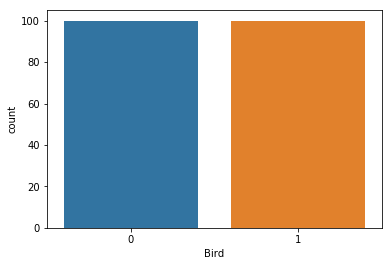

In [20]:
sns.countplot(data['Bird'])

In [21]:
x = data.drop('Bird',axis=1)
y = data['Bird']

In [22]:
from sklearn.preprocessing import minmax_scale
x = minmax_scale(x)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2)

In [24]:
lr = LogisticRegression()
model = lr.fit(x_train,y_train)

/home/praveen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
y_hat = model.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_hat,y_test)

array([[13,  7],
       [ 1, 19]])

In [27]:
from sklearn.feature_selection import RFE
selector = RFE(model)   #applying RFE to logistic regression
selector.fit(x_train,y_train)  

/home/praveen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/praveen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/praveen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/praveen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/praveen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [28]:
selector.ranking_#ra

array([ 1,  1,  1,  1,  1,  6,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,
        2,  7,  4,  1,  5,  1,  1,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [29]:
x = data.drop('Bird',axis=1)
y = data['Bird']

In [30]:
BirdClass1= x[x.columns[selector.support_]]#it will create a df with all obtained features
BirdClass1.head()

,vaxO,vayO,ccO,dataO,angelO1,vaxL,vayL,ccL,dataL,angelL1,vaxS,vayS,ccS,dataS,angelS1,ccC,angelC1,angelC2
0,3675.948992,3719.873990,0.021881,80.923200,52.592989,0.00,0.0,0.0,0.0,90.0,347.238668,373.335094,0.153292,55.325192,51.650580,0.793427,33.046472,-56.953528
1,3965.735177,3218.404725,-0.057718,-206.246065,-14.445753,0.25,0.0,0.0,0.0,0.0,1394.961069,568.740974,-0.251580,-224.481457,-14.238525,-0.130505,-7.679449,82.320551
2,3886.114991,3889.515733,-0.009079,-35.302245,-46.378941,0.00,0.0,0.0,0.0,90.0,3105.286818,1796.707429,-0.728930,-1744.130536,-34.596355,0.000000,90.000000,0.000000
3,4244.191365,4221.542235,0.007970,33.737701,35.721709,0.00,0.0,0.0,0.0,90.0,4501.795657,5587.706746,0.054039,273.610422,76.736415,0.000000,90.000000,0.000000
4,4027.260821,4398.653690,0.017723,74.666737,79.057519,0.00,0.0,0.0,0.0,90.0,0.000000,0.000000,0.000000,0.000000,90.000000,0.000000,90.000000,0.000000


In [31]:
x = pd.DataFrame(minmax_scale(x))

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2)

In [33]:
from scipy.stats import chi2#

In [34]:
degreeoffreedom = 140-1-(21-1)

In [35]:
#Creating a new Logistic model for our new data
model = sm.GLM(y_train,x_train,family=sm.families.Binomial()).fit()#logistic belongs to binomial family i;e normal distribution
print(model.summary())
#we have calculate below values to know our model perform.
print('INFO: Null deviance =',model.null_deviance)
print('INFO: Residual deviance =',model.deviance)
print('INFO: Critical Value of chi2 =',chi2.ppf(0.95,degreeoffreedom))
print('INFO: Pearson chi2 =',model.pearson_chi2)
print('INFO: P-value chi2 =',1-chi2.cdf(model.pearson_chi2,degreeoffreedom))
print('INFO: AIC =',model.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Bird   No. Observations:                  160
Model:                            GLM   Df Residuals:                      136
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -71.560
Date:                Sun, 14 Apr 2019   Deviance:                       143.12
Time:                        22:32:46   Pearson chi2:                     245.
No. Iterations:                     6   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0              1.5266      2.415      0.632      0.527      -3.207       6.260
1             -3.1334      2.498     -1.254      0.2

/home/praveen/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/praveen/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/praveen/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/praveen/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [36]:
#This function will replaces the probability values with 0's and 1's
def probreplace(y):#Here y is the function variable is called when ever required
    if y >= 0.52:
        return 1
    else:
        return 0

In [37]:
#gives the predicted probability values for train and test data and storing in new variables
y_train_prob = model.predict(x_train)
y_test_prob = model.predict(x_test)
#Applying the above function to replace prob values and storing in new variables
y_pred_train= y_train_prob.apply(probreplace)
y_pred_test = y_test_prob.apply(probreplace)

In [38]:
type(y_train_prob)

pandas.core.series.Series

In [39]:
#A  ConfusionMatrix is a table that is often used to describe the performance of a  model
from pandas_ml import ConfusionMatrix   
cm_train = ConfusionMatrix(y_train,y_pred_train)
cm_test = ConfusionMatrix(y_test,y_pred_test)

In [40]:
print('INFO: Confusion Matrix for Traning Data \n\n',cm_train,'\n\n')
print('INFO: Confusion Matrix for Testing Data \n\n',cm_test)

INFO: Confusion Matrix for Traning Data 

 Predicted  False  True  __all__
Actual                         
False         66    12       78
True          17    65       82
__all__       83    77      160 


INFO: Confusion Matrix for Testing Data 

 Predicted  False  True  __all__
Actual                         
False         19     3       22
True           5    13       18
__all__       24    16       40


In [41]:
print('For Traning Data')#gives overall performance of a model
cm_train.stats_overall

For Traning Data


/home/praveen/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.81875),
             ('95% CI', (0.7501802648267919, 0.8751260075850857)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 2.3062596443798096e-15),
             ('Kappa', 0.6378395254448954),
             ("Mcnemar's Test P-Value", 'ToDo')])

In [42]:
print('For Testing Data')
cm_test.stats_overall

For Testing Data


/home/praveen/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.8),
             ('95% CI', (0.6435219813207653, 0.9094775906000093)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.00606462839872809),
             ('Kappa', 0.5918367346938777),
             ("Mcnemar's Test P-Value", 'ToDo')])

# model dump and model loading 

In [43]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(model) 
  
# Load the pickled model 
glm_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
glm_from_pickle.predict(x_test)

189    0.777780
44     0.636528
150    0.955465
183    0.994182
113    0.306203
169    0.135467
116    0.930397
156    0.468769
32     0.933816
136    0.836466
10     0.233309
161    0.483451
112    0.110479
2      0.170568
124    0.253500
68     0.464133
138    0.070880
38     0.995679
153    0.435292
33     0.951707
70     0.458543
127    0.853994
1      0.940563
154    0.178826
89     0.619137
39     0.320628
92     0.471459
56     0.091443
85     0.195349
19     0.129603
197    0.357030
73     0.542686
98     0.183552
76     0.185677
109    0.928821
58     0.489210
71     0.207353
180    0.955031
173    0.565944
80     0.088188
dtype: float64

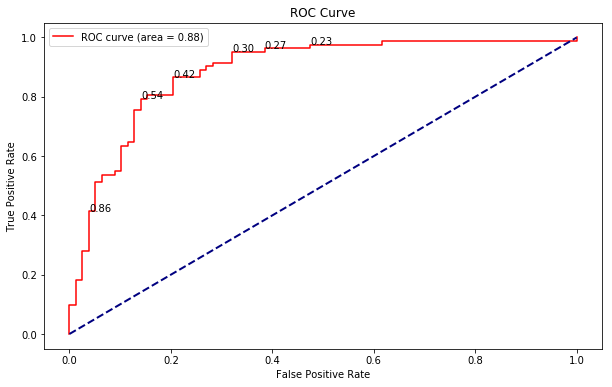

In [44]:
#Computes Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold = roc_curve(y_train,y_train_prob)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',lw=1.5)
plt.plot([0, 1], [0, 1], color='navy',lw = 2, linestyle='--')

for i,value in enumerate(fpr*10):
    try:
        if (round(fpr[i+1]*10) - round(fpr[i]*10)) == 1:
            plt.text(fpr[i],tpr[i],'%0.2f'%(threshold[i]))
    except IndexError:
        print(' ')
        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['ROC curve (area = %0.2f)' % auc(fpr,tpr)])
plt.show()

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
predTree = drugTree.predict(x_test)

In [67]:
cm_dt = ConfusionMatrix(y_train,drugTree.predict(x_train))

In [68]:
cm_dt.stats_overall

/home/praveen/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.49606299212598426),
             ('95% CI', (0.40617544957454527, 0.5861382890972416)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.8764264269138978),
             ('Kappa', -0.007187112763320896),
             ("Mcnemar's Test P-Value", 'ToDo')])

# RAndom forest by this method we are able to get 90 % accuracy

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
rmf=RandomForestClassifier(max_depth=3,random_state=42)
rf_class=rmf.fit(x_train,y_train) # fiting model 
seed=7
num_trees=30 # no of branches : 30 default
kfold=model_selection.KFold(n_splits=14,random_state=seed) 
result=model_selection.cross_val_score(rf_class,x_train,y_train,cv=kfold)
result.mean()

/home/praveen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8095238095238094

In [98]:
seed=7
num_trees=30 # no of branches : 30 default
kfold=model_selection.KFold(n_splits=14,random_state=seed) 
result=model_selection.cross_val_score(rf_class,x_train,y_train,cv=kfold)
result.mean()

0.8095238095238094

In [86]:
from sklearn.metrics import confusion_matrix
rf_y_test=rf_class.predict(x_test)
rf_y_train = rf_class.predict(x_train)
rf_cm_test=confusion_matrix(y_test,rf_y_test)
rf_cm_train = confusion_matrix(y_train,rf_y_train)
print(rf_cm_train ,'\n\n', rf_cm_test)

[[64 14]
 [ 5 77]] 

 [[16  6]
 [ 1 17]]


In [96]:
rf_acc_train=accuracy_score(y_train,rf_y_train)
rf_acc_test= accuracy_score(y_test,rf_y_test)
print('accuracy of train = ',rf_acc_train , '\n','='*40,'\n' , 'accuracy of test = ',rf_acc_test)

accuracy of train =  0.88125 
 accuracy of test =  0.825


# AdaBoost 

# KNN 

In [90]:
# import KNeighborsClassifier model 
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.metrics import accuracy_score
knn = KNN(n_neighbors = 5) 
  
# training model 
knn.fit(x_train, y_train) 
#accuracy test
knn_acc_test= accuracy_score(y_train,y_hat_train)
knn_acc_test

0.7875

# saving model through joblib

In [60]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(knn, 'filename.pkl') 
  
# Load the model from the file 
knn_from_joblib = joblib.load('filename.pkl')  
  
# Use the loaded model to make predictions 
knn_from_joblib.predict(x_test) 


array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [61]:
y_hat_train = knn_from_joblib.predict(x_train)

In [62]:
ConfusionMatrix(y_train,y_hat_train)

Predicted  False  True  __all__
Actual                         
False         31    33       64
True          36    27       63
__all__       67    60      127

In [63]:
from sklearn.metrics import accuracy_score
knn_acc_test= accuracy_score(y_train,y_hat_train)
knn_acc_test

0.7875

# selecting K value 

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc , std_acc

(array([0.725, 0.625, 0.8  , 0.7  , 0.775, 0.675, 0.725, 0.725, 0.7  ]),
 array([0.07060011, 0.07654655, 0.06324555, 0.07245688, 0.06602556,
        0.07405657, 0.07060011, 0.07060011, 0.07245688]))